In [44]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# longitudes en metros
L1 = 0.25
L2 = 0.5
L3 = 2
# cargas kN
F_aplicada_B = -3 
F_aplicada_C = 8
# distribuida kN / m
w = 4.8

In [7]:
# PROBLEMA 2: MUCHO CÓDIGO DUPLICADO
# longitudes en metros
L1 = float(input("Ingrese la longitud del tramo 1 en metros: "))
L2 = float(input("Ingrese la longitud del tramo 2 en metros: "))
L3 = float(input("Ingrese la longitud del tramo 3 en metros: "))
# cargas kN
F_aplicada_B = float(input("Ingrese la longitud del tramo 1 en metros: "))
F_aplicada_C = float(input("Ingrese la longitud del tramo 1 en metros: "))
# distribuida kN / m
w = float(input("Ingrese la longitud del tramo 1 en metros: "))

Ingrese la longitud del tramo 1 en metros: 5


In [77]:
# SOLUCION: BUCLE
# guardar en una estructura todas las variables que vamos a pedir
variables = [
    "Longitud tramo 1",
    "Longitud tramo 2",
]

for variable in variables:
    valor_entrada = input(f"Ingrese {variable}: ")

Ingrese Longitud tramo 1: 5
Ingrese Longitud tramo 2: 5


# SOLUCION ÓPTIMA: USAR DICCIONARIOS

In [6]:
viga = {
    "L1": "metros",
    "L2": "metros",
    "L3": "metros",
    "F_aplicada_B": "kN",
    "F_aplicada_C": "kN",
    "w": "kN / m",
}
viga

{'L1': 'metros',
 'L2': 'metros',
 'L3': 'metros',
 'F_aplicada_B': 'kN',
 'F_aplicada_C': 'kN',
 'w': 'kN / m'}

In [24]:
# problema 1 diccionarios: como guardo dentro de las llaves
viga["L1"] = True
viga

{'L1': 5.0,
 'L2': 3.0,
 'L3': 2.0,
 'F_aplicada_B': '',
 'F_aplicada_C': '',
 'w': '',
 'carga': 5}

In [17]:
# problema 2: como accedo a la llave de forma dinamica
# for variable_iteracion in objeto_iterable:
    # lo que quiero hacer en cada iteracion

# problema 3: float es propenso a errores

for llave in viga.keys():
    # 2. colocar el codigo propenso a errores dentro del try
    while True:
        try:
            viga[llave] = float(input(f"Ingrese el valor de {llave} en {viga[llave]}: "))
            break
        # 3. colocar el codigo que se ejcute si el error ocurre
        except:
            print(f"Hubo un error, ingrese el valor de {llave} correctamente")

print(viga)

Ingrese el valor de L1 en 5.0: 0.25
Ingrese el valor de L2 en 4.0: 0.5
Ingrese el valor de L3 en 5.0: 2
Ingrese el valor de F_aplicada_B en 55.0: -3
Ingrese el valor de F_aplicada_C en 1.0: 8
Ingrese el valor de w en 5.0: 4.8
{'L1': 0.25, 'L2': 0.5, 'L3': 2.0, 'F_aplicada_B': -3.0, 'F_aplicada_C': 8.0, 'w': 4.8}


In [12]:
viga

{'L1': 5.0,
 'L2': 4.0,
 'L3': 5.0,
 'F_aplicada_B': 55.0,
 'F_aplicada_C': 1.0,
 'w': 5.0}

# Manejo de excepciones
Usamos los bloques de código `try - except`

In [6]:
number = -5
if number > 0:
    print("Numero es positivo")
else:
    print("Numero negativo")
    


Numero negativo


In [9]:
number = "5"

# va a ejecutar todas las lineas hasta que encuentre un error
# en caso de encontrar un error, se para la ejecucion del try y se ejecuta el bloque except
try:
    print("Linea 1")
    print(5 ** 2)
    print(float(number))
    print("Hola")
except:
    print("Hubo un error ejecutando")
    
print("Programa finalizado")

Linea 1
25
5.0
Hola
Programa finalizado


# BUCLES INFINITOS

In [76]:

mensaje = ""

while True:
    mensaje = input("Ingrese un mensaje")
    if mensaje == "Hola":
        break

Ingrese un mensajeHola


In [16]:
number = 6

while True:
    print("Numero positivo")
    number = number - 1
    if number == 0:
        break

Numero positivo
Numero positivo
Numero positivo
Numero positivo
Numero positivo
Numero positivo


# Ecuaciones equilibrio de la viga

In [38]:
Ax, Ay, Ma, x = sp.symbols("Ax Ay Ma x")

In [23]:
equilibrio_y = Ay + viga['F_aplicada_B'] + viga['F_aplicada_C'] - viga['w'] * (viga['L1'] + viga['L3']) / 2 - viga['w'] * viga['L2']
ecuacion_y = sp.Eq(equilibrio_y, 0)
fuerza_Ay = sp.solve(ecuacion_y)[0]
# en kN
fuerza_Ay

2.80000000000000

In [24]:
equilibrio_x = Ax + 0
ecuacion_x = sp.Eq(equilibrio_x, 0)
fuerza_Ax = sp.solve(ecuacion_x)[0]
# en kN
fuerza_Ax

0

In [27]:
equilibrio_momentos = Ma + viga['F_aplicada_B'] * viga['L1'] + viga['F_aplicada_C'] * (viga['L1'] + viga['L2']) - viga["w"] * viga["L1"] / 2 * (2 * viga["L1"] / 3) - viga["w"] * viga["L2"] * (viga["L1"] + viga["L2"] / 2) - viga["w"] * viga["L3"] / 2 * (viga["L1"] + viga["L2"] +  viga["L3"] / 3) 
ecuacion_momentos = sp.Eq(equilibrio_momentos, 0)
momento_A = sp.solve(ecuacion_momentos)[0]
# kN - m
momento_A

2.85000000000000

# Funciones de momento

In [31]:
# Tramo1 0 < x < L1
funcion_w = viga['w'] * x / viga['L1']
cortante_1 = fuerza_Ay - sp.integrate(funcion_w, x)
momento_1 = - momento_A + sp.integrate(cortante_1, x)
momento_1

-3.2*x**3 + 2.8*x - 2.85

In [33]:
# Tramo2 0 < x < L2
funcion_w = viga['w']
cortante_2 = viga['F_aplicada_B'] + cortante_1.subs(x, viga['L1']) - sp.integrate(funcion_w, x)
momento_2 = momento_1.subs(x, viga['L1']) + sp.integrate(cortante_2, x)
momento_2

-2.4*x**2 - 0.8*x - 2.2

In [36]:
# Tramo2 0 < x < L3
funcion_w = - viga['w'] * x / viga['L3'] + viga['w']
cortante_3 = viga['F_aplicada_C'] + cortante_2.subs(x, viga['L2']) - sp.integrate(funcion_w, x)
momento_3 = momento_2.subs(x, viga['L2']) + sp.integrate(cortante_3, x)
momento_3

0.4*x**3 - 2.4*x**2 + 4.8*x - 3.2

# Calcular el momento máximo

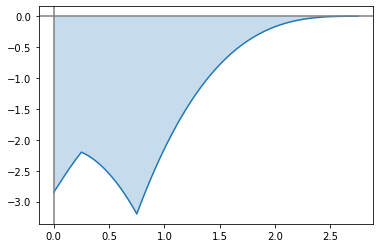

In [75]:
x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.005, 0.005)

tramo1 = sp.lambdify(x, momento_1)(x_array[x_array < viga["L1"]])
tramo2 = sp.lambdify(x, momento_2)(x_array[(x_array >= viga["L1"]) & (x_array < (viga["L1"] + viga["L2"]) )] - viga["L1"])
tramo3 = sp.lambdify(x, momento_3)(x_array[x_array >= (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

plt.plot(x_array, np.concatenate((tramo1, tramo2, tramo3)))
plt.fill_between(x_array, np.concatenate((tramo1, tramo2, tramo3)), alpha=0.25)
plt.axvline(0, color="gray")
plt.axhline(0, color="gray")

In [70]:
momentos = np.concatenate((tramo1, tramo2, tramo3))
maximo_positivo = np.amax(momentos)

In [72]:
# kN - m
maximo_negativo = np.amin(momentos)

In [73]:
if np.absolute(maximo_negativo) > maximo_positivo:
    maximo = np.absolute(maximo_negativo)
else:
    maximo = maximo_positivo
    
maximo

3.2